1)	Изучите материал лекции 12, проделайте пример, описанный в ходе работы.
2)	Создайте свой «мешок слов», например, набор из 20-25 отзывов о чем-либо, напишите краткое пояснение к данным.
3)	Создайте словарь стоп-слов, примените стоп-слова к своему «мешку слов»
4)	Масштабируйте данные с помощью tf-idf
5)	Исследуйте коэффициенты модели
6)	Сделайте выводы по работе.


In [48]:
import numpy as np
from sklearn.datasets import load_files
reviews_train=load_files("aclImdb/train/")
text_train, y_train=reviews_train.data, reviews_train.target

In [2]:
text_train=[doc.replace(b"<br /", b" ") for doc in text_train]

In [3]:
reviews_test=load_files("aclImdb/test/")
text_test, y_test=reviews_test.data, reviews_test.target
text_test=[doc.replace(b"<br /", b" ") for doc in text_test]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(max_features=10000, max_df=.15)
X=vect.fit_transform(text_train)

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
document_topics=lda.fit_transform(X)

In [6]:
lda.components_.shape

(10, 10000)

In [7]:
sorting=np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names=np.array(vect.get_feature_names_out())

In [8]:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        worst         plays         cast          show          
horror        didn          comedy        role          funny         
game          nothing       role          john          book          
effects       horror        school        performance   saw           
original      actually      town          star          years         
quite         minutes       harry         young         again         
fight         funny         played        play          10            
lot           actors        western       music         comedy        
however       re            joe           musical       am            
though        going         girl          plays         dvd           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
dire

In [42]:
lda100=LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100=lda100.fit_transform(X)

In [43]:
topics=np.array([7,16,24,25,28,36,37,45,51,53,54,63, 89,97])
sorting=np.argsort(lda100.components_, axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,sorting=sorting,topics_per_chunk=7,n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
with          with          with          with          with          with          with          
immersive     immersive     immersive     immersive     immersive     immersive     immersive     
felt          felt          felt          felt          felt          felt          felt          
finish        finish        finish        finish        finish        finish        finish        
finished      finished      finished      finished      finished      finished      finished      
friends       friends       friends       friends       friends       friends       friends       
from          from          from          from          from          from          from          
heartwarming  heartwarming  heartwarming  heartwarming  heartwarming  heartwarming  heartwarming  
highly    

In [44]:
music=np.argsort(document_topics100[:,45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2])+b".\n")

b'The hype around this novel was unwarranted. The narrative was predictable, and the twists were clich\xc3\xa9.\n'
b'I highly recommend this book to anyone seeking an immersive and thoughtfully crafted story..\n'
b"I couldn't stop thinking about this book. The narrative was thought-provoking, and the themes were powerful.\n"
b'This novel was a page-turner. The pacing was perfect, and the suspense kept me engaged throughout.\n'
b'This book was a struggle to finish. The pacing was off, and it lacked any engaging elements.\n'
b'A delightful surprise! The plot was refreshing, and the characters felt like old friends by the end..\n'
b"A promising start quickly led to a confusing and convoluted plot. I couldn't make sense of it.\n"
b'I expected much more from this book, but it turned out to be mundane and uninspiring..\n'
b'The characters were one-dimensional, and their actions seemed unrealistic. It ruined the whole reading experience.\n'
b'An uplifting and heartwarming read. The author ski

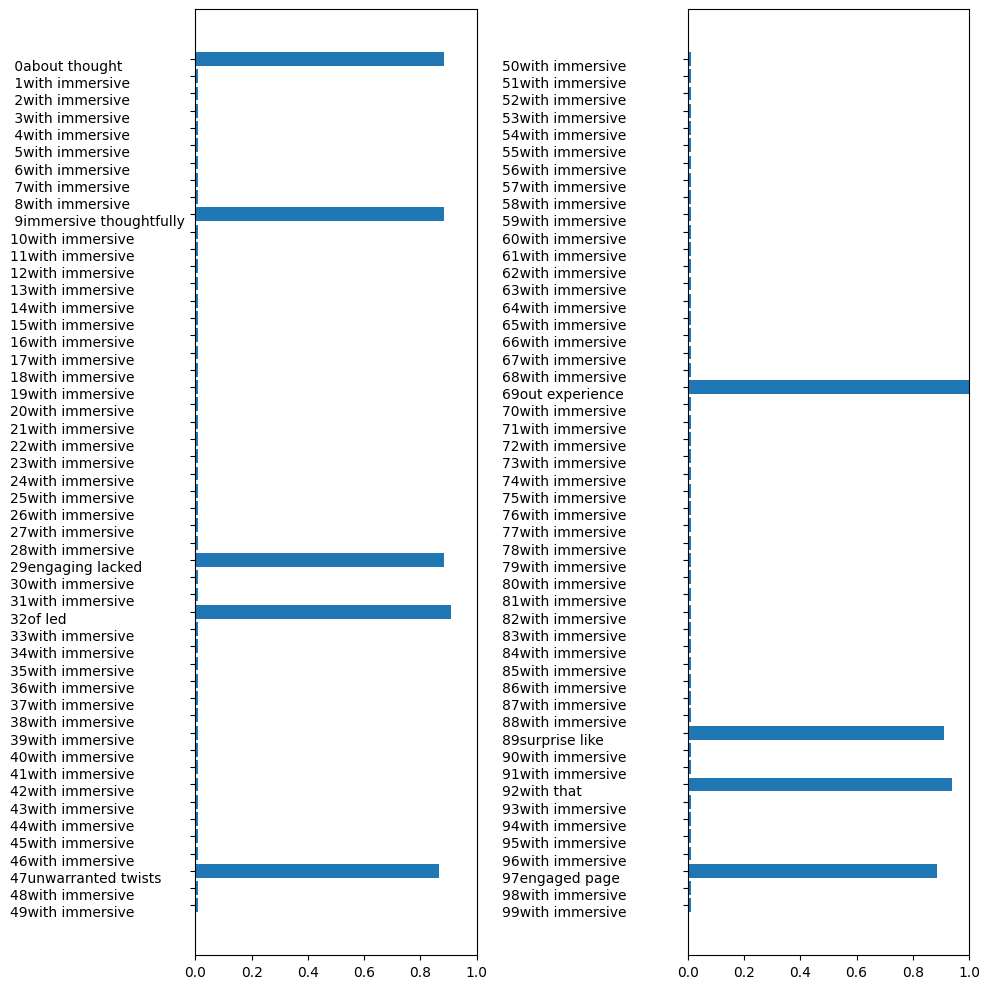

In [46]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,2,figsize=(10,10))
topic_names=["{:>2}".format(i)+" ".join(words)
             for i, words in enumerate(feature_names[sorting[:,:2]])]
for col in [0,1]:
    start=col*50
    end=(col+1)*50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 1)
    yax=ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()

<h1>Book_reviews - отзывы о книгах</h1>

In [19]:
book_reviews_train=load_files("book_reviews/train/")
text_train, y_train=book_reviews_train.data, book_reviews_train.target

In [20]:
text_train=[doc.replace(b"<br /", b" ") for doc in text_train]

In [21]:
book_reviews_test=load_files("book_reviews/test/")
text_test, y_test=book_reviews_test.data, book_reviews_test.target
text_test=[doc.replace(b"<br /", b" ") for doc in text_test]

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(max_features=10000, max_df=.15)
X=vect.fit_transform(text_train)

In [23]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
document_topics=lda.fit_transform(X)

In [24]:
lda.components_.shape

(10, 85)

In [25]:
sorting=np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names=np.array(vect.get_feature_names_out())

In [30]:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
about         with          seeking       their         seeking       
stop          stayed        thoughtfully  dimensional   thoughtfully  
provoking     that          anyone        ruined        anyone        
powerful      read          recommend     seemed        recommend     
thought       long          crafted       one           crafted       
themes        heartwarming  immersive     whole         immersive     
thinking      finished      highly        experience    highly        
recommend     together      refreshing    reading       refreshing    
thoughtfully  author        surprise      actions       surprise      
immersive     after         like          unrealistic   like          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
off 

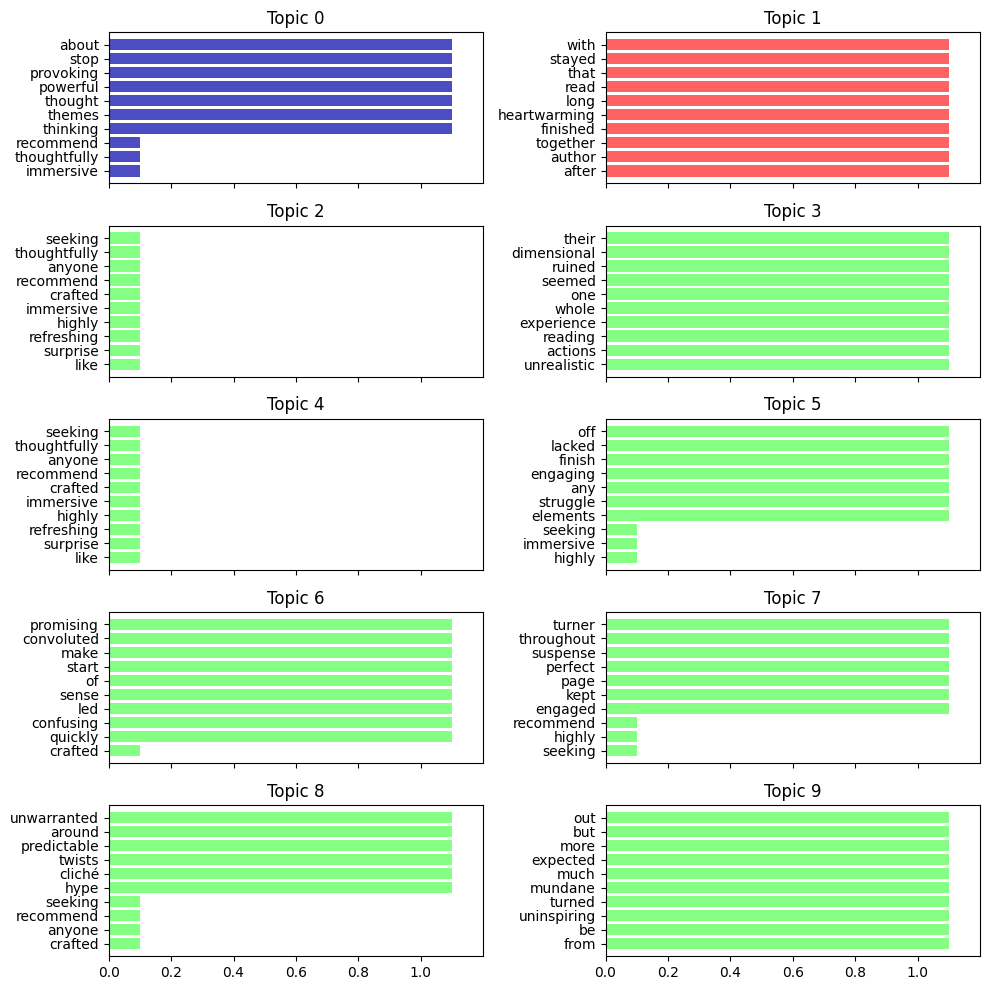

In [31]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(5, 2, figsize=(10, 10), sharex=True)
ax = np.array(ax).flatten()


top_words_indices = sorting[:, :10]
colors = mglearn.cm3(np.arange(10))

for topic_idx, ax in enumerate(ax):
    ax.barh(range(10), lda.components_[topic_idx, top_words_indices[topic_idx]], color=colors[topic_idx], alpha=0.7)
    ax.set_yticks(range(10))
    ax.set_yticklabels(feature_names[top_words_indices[topic_idx]])
    ax.invert_yaxis()
    ax.set_xlim(0, lda.components_[topic_idx, top_words_indices[topic_idx]].max() + 0.1)
    ax.set_title(f'Topic {topic_idx}')

plt.tight_layout()
plt.show()

In [32]:
word_weights_by_topic = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

for topic_idx, top_words_indices in enumerate(sorting):
    top_words = feature_names[top_words_indices]
    weights = word_weights_by_topic[topic_idx, top_words_indices]

    print(f"Тема {topic_idx}:")
    for word, weight in zip(top_words, weights):
        print(f"{word}: {weight}")
    print("="*50)

Тема 0:
about: 0.07096774178086365
stop: 0.07096774178086365
provoking: 0.07096774178086365
powerful: 0.07096774178086365
thought: 0.07096774178086365
themes: 0.07096774178086364
thinking: 0.07096774178086364
recommend: 0.006451612933373353
thoughtfully: 0.006451612933373353
immersive: 0.006451612933373353
highly: 0.006451612933373353
crafted: 0.006451612933373353
anyone: 0.006451612933373353
seeking: 0.006451612933373353
like: 0.006451612925825887
friends: 0.006451612925825887
felt: 0.006451612925825887
end: 0.006451612925825887
delightful: 0.006451612925825887
by: 0.006451612925825887
refreshing: 0.006451612925825887
old: 0.006451612925825887
surprise: 0.006451612925825887
stayed: 0.006451612917910822
that: 0.006451612917910822
after: 0.006451612917910822
weaved: 0.006451612917910822
author: 0.006451612917910822
uplifting: 0.006451612917910822
finished: 0.006451612917910822
heartwarming: 0.006451612917910822
together: 0.006451612917910822
long: 0.006451612917910822
with: 0.0064516129